In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('D:\Cars\car_data.csv')
display(df)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [16]:
df['Years_Old']= 2023 - df['Year']
display(df)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Years_Old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,7
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,8
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,14
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,6


In [17]:
# there can be many different car names(categorical) and it is of no use
df.drop(['Car_Name'], axis=1, inplace= True)

In [20]:
df = pd.get_dummies(df, drop_first= True)
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,9,0,1,0,1
1,2013,4.75,9.54,43000,0,10,1,0,0,1
2,2017,7.25,9.85,6900,0,6,0,1,0,1
3,2011,2.85,4.15,5200,0,12,0,1,0,1
4,2014,4.60,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,7,1,0,0,1
297,2015,4.00,5.90,60000,0,8,0,1,0,1
298,2009,3.35,11.00,87934,0,14,0,1,0,1
299,2017,11.50,12.50,9000,0,6,1,0,0,1


<Axes: >

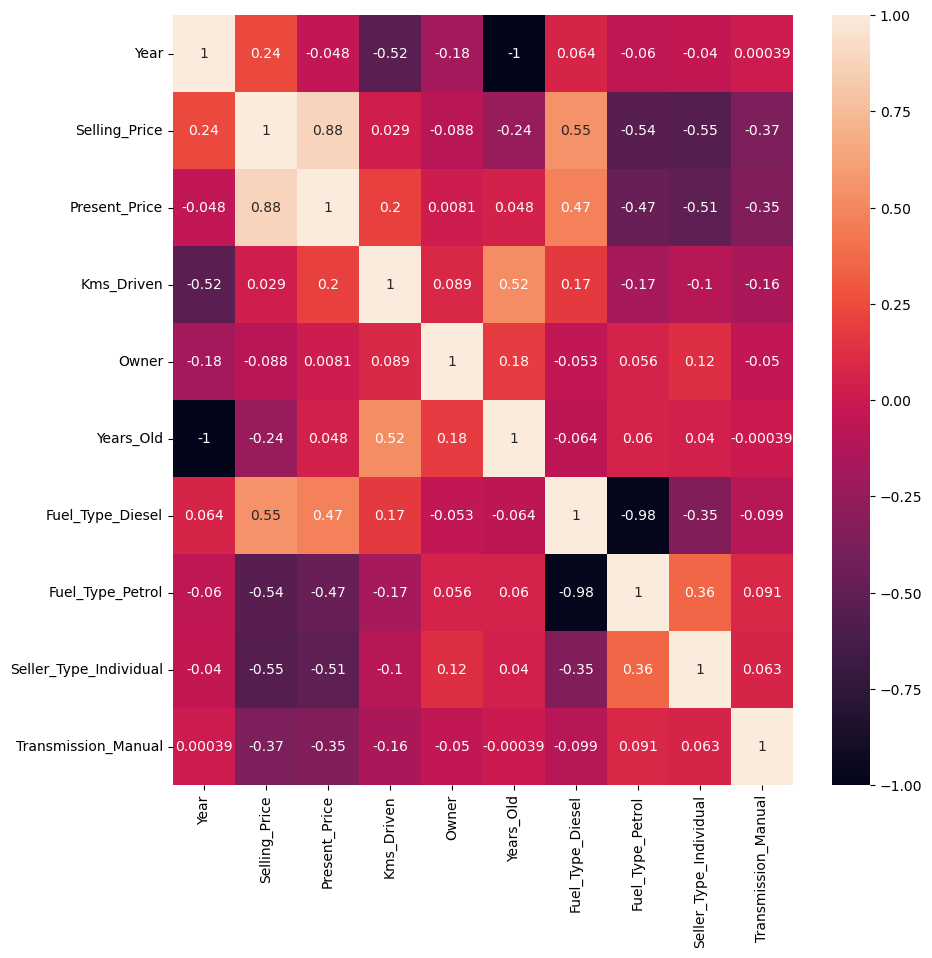

In [25]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

In [31]:
#only selling price is dependent and all others are independent
#both x and y contain all rows 
# x contains all colums starting from 2nd column i.e., index 1 and y contains only first column i.e., index 0
x = df.iloc[:, 2:]
y = df.iloc[:, 1]

In [32]:
x

,Present_Price,Kms_Driven,Owner,Years_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,9,0,1,0,1
1,9.54,43000,0,10,1,0,0,1
2,9.85,6900,0,6,0,1,0,1
3,4.15,5200,0,12,0,1,0,1
4,6.87,42450,0,9,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,7,1,0,0,1
297,5.90,60000,0,8,0,1,0,1
298,11.00,87934,0,14,0,1,0,1
299,12.50,9000,0,6,1,0,0,1


In [33]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [34]:
print(model.feature_importances_)

[3.67974871e-01 4.31461165e-02 3.64839489e-04 7.23095750e-02
 2.25376602e-01 1.56954388e-02 1.27673649e-01 1.47458909e-01]


<Axes: >

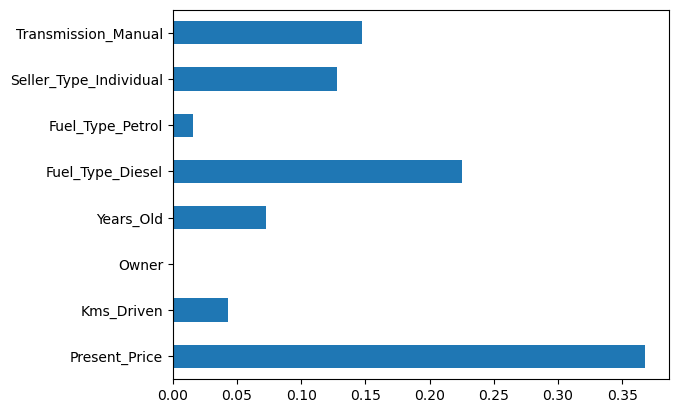

In [35]:
feature_imp = pd.Series(model.feature_importances_, index = x.columns)
feature_imp.plot(kind= "barh")
